In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv("data.csv")

X_train = data[['feature1', 'feature2']].values
y_train = data['label'].values

m, n = X_train.shape

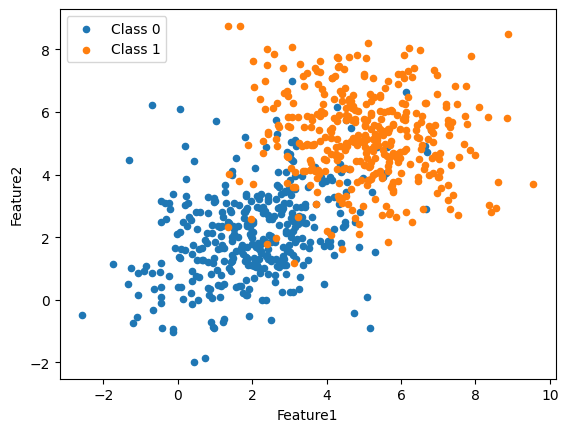

In [12]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='tab:blue', label='Class 0', s=20)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='tab:orange', label='Class 1', s=20)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [14]:
def cost_function(X, y, w, b):
    cost_sum = 0

    for i in range(m):
        z = np.dot(w, X[i]) + b
        g = sigmoid(z)

        cost_sum += -y[i] * np.log(g) - (1 - y[i]) * np.log(1 - g)

    return (1/m) * cost_sum

In [15]:
def gradient_function(X, y, w, b):
    grad_w = np.zeros(n)
    grad_b = 0

    for i in range(m):
        z = np.dot(w, X[i]) + b
        g = sigmoid(z)

        grad_b += (g - y[i])
        for j in range(n):
            grad_w[j] += (g - y[i]) * X[i, j]

    grad_b = (1/m) * grad_b
    grad_w = (1/m) * grad_w

    return grad_b, grad_w

In [16]:
def gradient_descent(X, y, alpha, iterations):
    w = np.zeros(n)
    b = 0

    for i in range(iterations):
        grad_b, grad_w = gradient_function(X, y, w, b)

        w = w - alpha * grad_w
        b = b - alpha * grad_b

        if i % 1000 == 0:
            print(f"Iteration {i}: Cost {cost_function(X, y, w, b)}")
    
    return w, b

In [17]:
def predict(X, w, b):
    preds = np.zeros(m)

    for i in range(m):
        z = np.dot(w, X[i]) + b
        g = sigmoid(z)

        preds[i] = 1 if g >= 0.5 else 0
    
    return preds

In [18]:
learning_rate = 0.01
iterations = 10000

final_w, final_b = gradient_descent(X_train, y_train, learning_rate, iterations)

predictions = predict(X_train, final_w, final_b)
accuracy = np.mean(predictions == y_train) * 100
print(f"training accuracy: {accuracy:.2f}%")

Iteration 0: Cost 0.6824949816415531
Iteration 1000: Cost 0.45326827371733497
Iteration 2000: Cost 0.37785921586078636
Iteration 3000: Cost 0.33792738371120384
Iteration 4000: Cost 0.31371690796565804
Iteration 5000: Cost 0.2976756758553554
Iteration 6000: Cost 0.286377986767748
Iteration 7000: Cost 0.27806206840301506
Iteration 8000: Cost 0.2717341118536158
Iteration 9000: Cost 0.2667927915829158
training accuracy: 91.47%


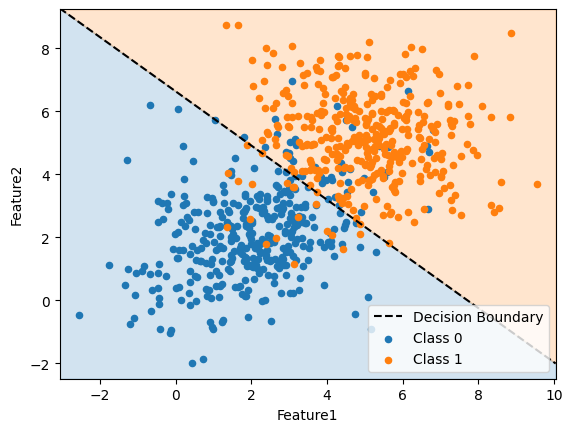

In [19]:
m = -final_w[0] / final_w[1]
c = -final_b / final_w[1]

xmin, xmax = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
ymin, ymax = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xd = np.array([xmin, xmax])
yd = m * xd + c

plt.plot(xd, yd, 'k', ls='--', label='Decision Boundary')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='tab:blue', label='Class 0', s=20)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='tab:orange', label='Class 1', s=20)
plt.legend()
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()